<h1>California Housing Price Prediction</h1>

<h2>Brève présentation du projet</h2>

<p>Ce projet a pour objectif de <em>de traiter de A à Z un projet Data Science</em>. Nous allons explorer les différentes phases d'un projet Data Sceince à savoir <strong> la déscription de la problématique, le data gathering (kaggle), le Data Cleaning, le Data Analysis et Feature Engineering, le dispatch en phase d'entrainement et en phase de test, le model selection, le training, l'évaluation du modèle et la conclusion</strong>.</p>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<p>Maintenant, nous allons spliter notre Dataset en Training et en Test.
X étant les features, il faudra qu'on supprime de X les target variables, puisque c'est Y.
axis=1 indique que la suppression doit se faire sur la colonne. axis=0 indique les lignes
</p>

In [10]:
from sklearn.model_selection import train_test_split

X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

<p>test_size=0.2 signifie que la taille du dataset de test sera de 20%</p>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
train_data = X_train.join(y_train) #On rassemble les data d'entrainement

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6360,-117.98,34.14,24.0,1596.0,388.0,1329.0,352.0,3.0417,INLAND,148000.0
12506,-121.43,38.56,50.0,1533.0,288.0,532.0,257.0,2.5417,INLAND,125900.0
9899,-122.28,38.29,19.0,531.0,112.0,139.0,80.0,1.9875,NEAR BAY,325000.0
423,-122.26,37.88,52.0,2551.0,417.0,894.0,404.0,6.2425,NEAR BAY,391800.0
18224,-122.09,37.40,36.0,1575.0,379.0,1036.0,382.0,5.1408,NEAR BAY,264700.0
...,...,...,...,...,...,...,...,...,...,...
4033,-118.55,34.17,36.0,2127.0,297.0,761.0,274.0,7.8392,<1H OCEAN,500001.0
16434,-121.23,38.09,23.0,633.0,91.0,236.0,83.0,6.4562,INLAND,230000.0
16031,-122.45,37.72,46.0,1406.0,235.0,771.0,239.0,4.7143,NEAR BAY,219300.0
7286,-118.24,33.98,45.0,173.0,42.0,230.0,57.0,3.0724,<1H OCEAN,110700.0


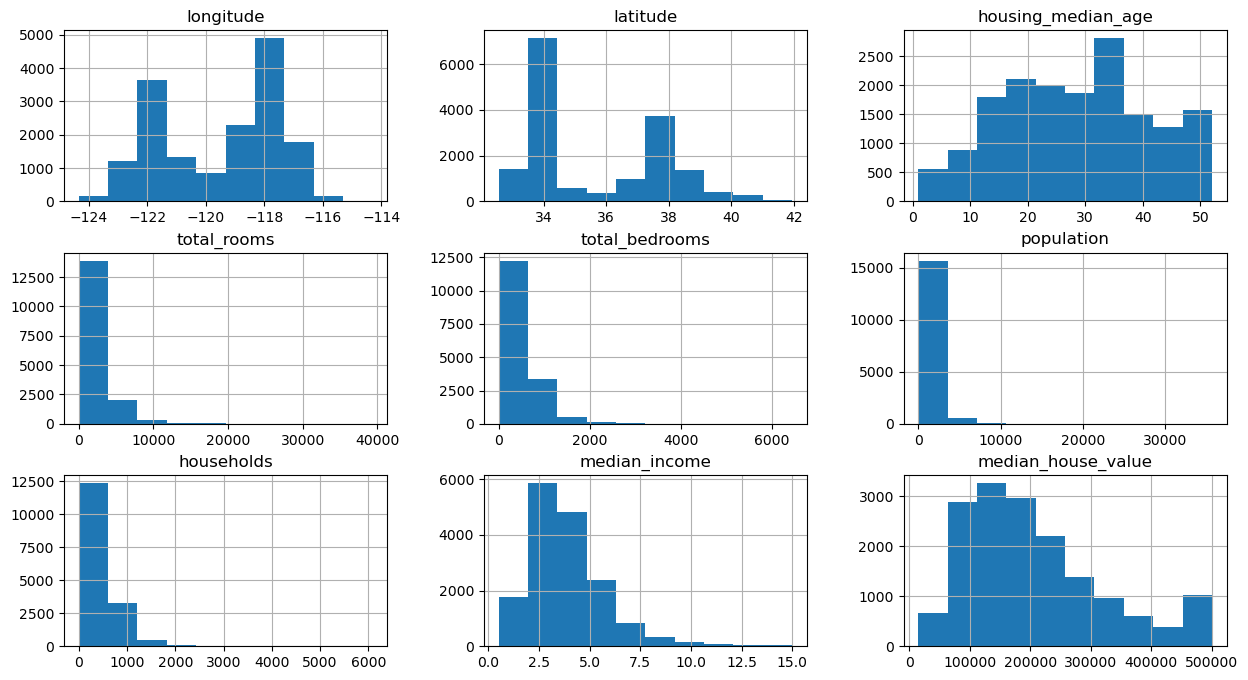

In [14]:
train_data.hist(figsize=(15,8))
numeric_train_data = train_data.select_dtypes(include=['number'])

<Axes: >

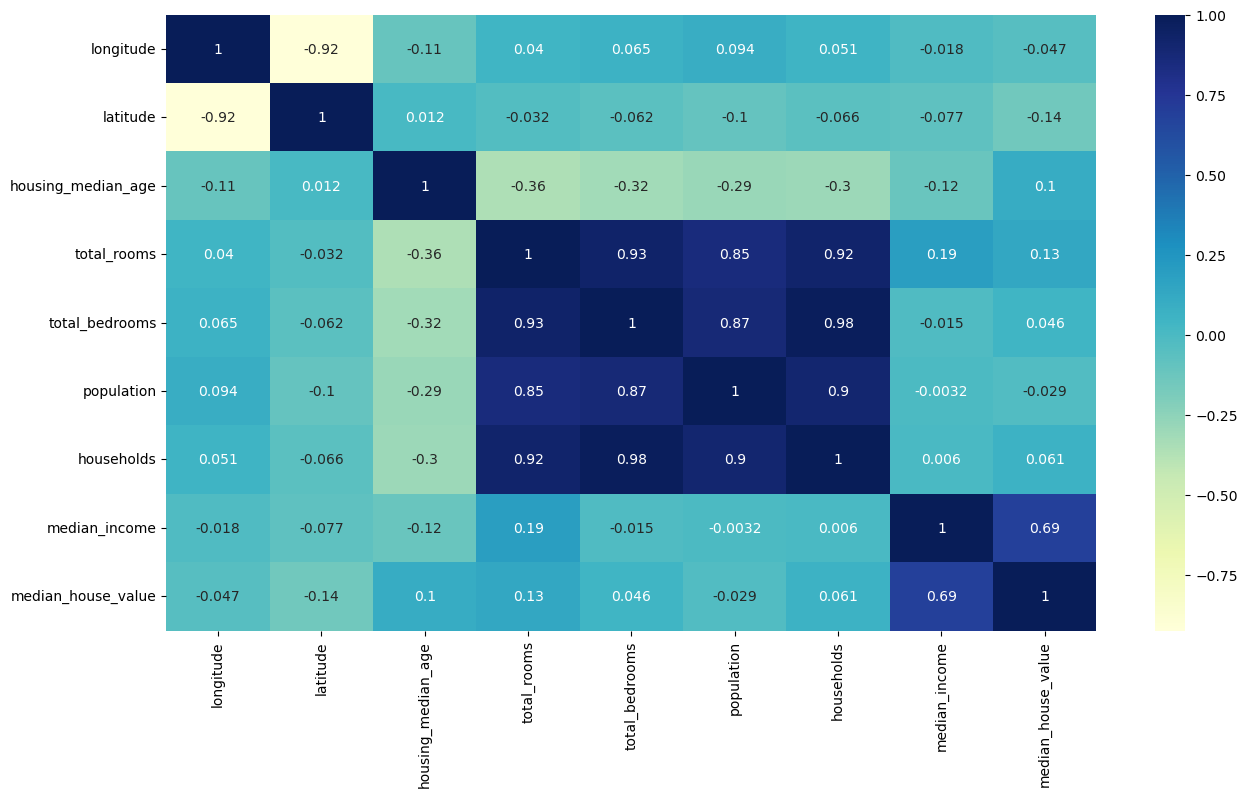

In [15]:
numeric_train_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(numeric_train_data.corr(), annot=True, cmap="YlGnBu")

In [16]:
numeric_train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923810,-0.109063,0.040271,0.064767,0.093827,0.050553,-0.018464,-0.047375
latitude,-0.923810,1.000000,0.011869,-0.031929,-0.062084,-0.103321,-0.066346,-0.077145,-0.142992
housing_median_age,-0.109063,0.011869,1.000000,-0.359232,-0.317259,-0.291194,-0.298776,-0.116416,0.099590
total_rooms,0.040271,-0.031929,-0.359232,1.000000,0.930819,0.851854,0.918376,0.191160,0.130882
total_bedrooms,0.064767,-0.062084,-0.317259,0.930819,1.000000,0.874549,0.979116,-0.014758,0.045601
population,0.093827,-0.103321,-0.291194,0.851854,0.874549,1.000000,0.904771,-0.003179,-0.029269
households,0.050553,-0.066346,-0.298776,0.918376,0.979116,0.904771,1.000000,0.005980,0.060747
median_income,-0.018464,-0.077145,-0.116416,0.191160,-0.014758,-0.003179,0.005980,1.000000,0.690711
median_house_value,-0.047375,-0.142992,0.099590,0.130882,0.045601,-0.029269,0.060747,0.690711,1.000000




<h1>Passons maintenant à la phase de Pre-processing</h1>

En regardant les histogrammes de nos variables notamment : <strong>total_rooms, total_bedrooms,  population, households </strong>, nous remarquons qu'elles ne sont pas normalement distribuées et n'ont pas la forme de cloche de Gauss.
    Pour ces features, nous allons prendre le logarithme qui nous permettra de les normaliser un peu mieux.

La transformation logarithmique est une technique couramment utilisée pour réduire l'asymétrie (ou skewness) des données et rendre leur distribution plus symétrique. Cela peut aider à stabiliser la variance et à rendre les modèles de machine learning plus robustes.

Beaucoup de techniques statistiques et algorithmes de machine learning fonctionnent mieux lorsque les variables d'entrée suivent une distribution normale ou proche de la normale. Cela peut améliorer les performances des modèles et la qualité des prédictions.

Les valeurs dans ces colonnes peuvent inclure des zéros. Le logarithme de zéro est indéfini (et les logarithmes des nombres négatifs ne sont pas définis dans les nombres réels), donc on ajoute 1 pour éviter d'obtenir des valeurs indéfinies ou des erreurs de calcul.

In [17]:
# Transformation logarithmique des variables pour normaliser leur distribution
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

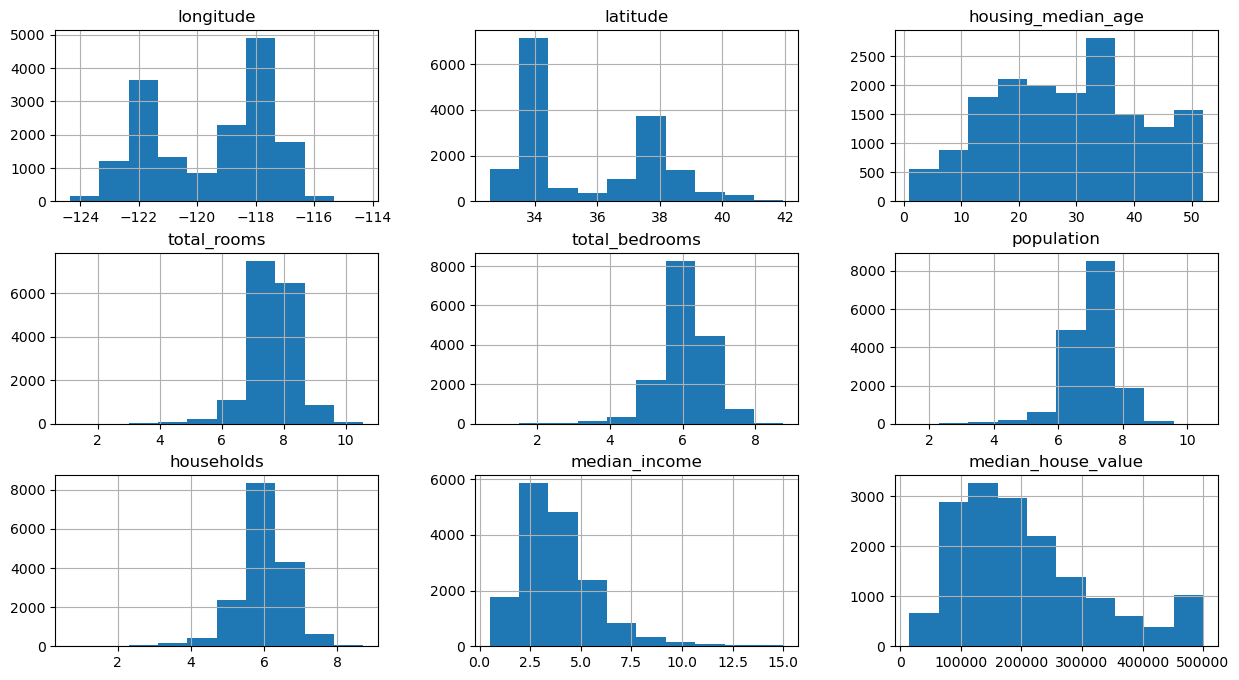

In [18]:
train_data.hist(figsize=(15,8))

Maintenant, nous allons nous intéresser à la variable <strong>ocean_proximity</strong> qui, de façon générale, les prix sont plus élévés pour les maison près de la mer.

Cependant, dans la colonne, nous avons les valeurs <1H OCEAN, INLAND, NEAR BAY etc., que nous ne pourrons pas traiter de façon brute mais qui nécessite d'être transformée en valeurs numériques.

In [19]:
#voyons un peu le nombre de chacun des valeurs
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7225
INLAND        5182
NEAR OCEAN    2123
NEAR BAY      1812
ISLAND           4
Name: count, dtype: int64

# Transformation en variables dummy (encodage one-hot)
<strong>pd.get_dummies()</strong> : Cette fonction transforme la colonne catégorielle en plusieurs colonnes, une pour chaque catégorie unique de la colonne d'origine. Chaque nouvelle colonne contient des valeurs binaires (0 ou 1), indiquant la présence ou l'absence de la catégorie correspondante pour chaque échantillon.

In [20]:
pd.get_dummies(train_data.ocean_proximity,dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6360,0,1,0,0,0
12506,0,1,0,0,0
9899,0,0,0,1,0
423,0,0,0,1,0
18224,0,0,0,1,0
...,...,...,...,...,...
4033,1,0,0,0,0
16434,0,1,0,0,0
16031,0,0,0,1,0
7286,1,0,0,0,0


Nous allons maintenant :

    1) Coller les variables dummy avec notre Dataset d'entrainement
    2) Supprimer la colonne ocean_proximity car ne sert plus à rien
    3) Sauvegarder, en affectant le tout à train_data

In [21]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'], axis=1)

In [22]:
#Nous verrons ici que le dataset le contient plus la colonne ocean_proximity
#Les nouveaux colonnes créees sont bien là
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6360,-117.98,34.14,24.0,7.375882,5.963579,7.192934,5.866468,3.0417,148000.0,0,1,0,0,0
12506,-121.43,38.56,50.0,7.335634,5.666427,6.278521,5.552960,2.5417,125900.0,0,1,0,0,0
9899,-122.28,38.29,19.0,6.276643,4.727388,4.941642,4.394449,1.9875,325000.0,0,0,0,1,0
423,-122.26,37.88,52.0,7.844633,6.035481,6.796824,6.003887,6.2425,391800.0,0,0,0,1,0
18224,-122.09,37.40,36.0,7.362645,5.940171,6.944087,5.948035,5.1408,264700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,-118.55,34.17,36.0,7.662938,5.697093,6.635947,5.616771,7.8392,500001.0,1,0,0,0,0
16434,-121.23,38.09,23.0,6.452049,4.521789,5.468060,4.430817,6.4562,230000.0,0,1,0,0,0
16031,-122.45,37.72,46.0,7.249215,5.463832,6.648985,5.480639,4.7143,219300.0,0,0,0,1,0
7286,-118.24,33.98,45.0,5.159055,3.761200,5.442418,4.060443,3.0724,110700.0,1,0,0,0,0


<Axes: >

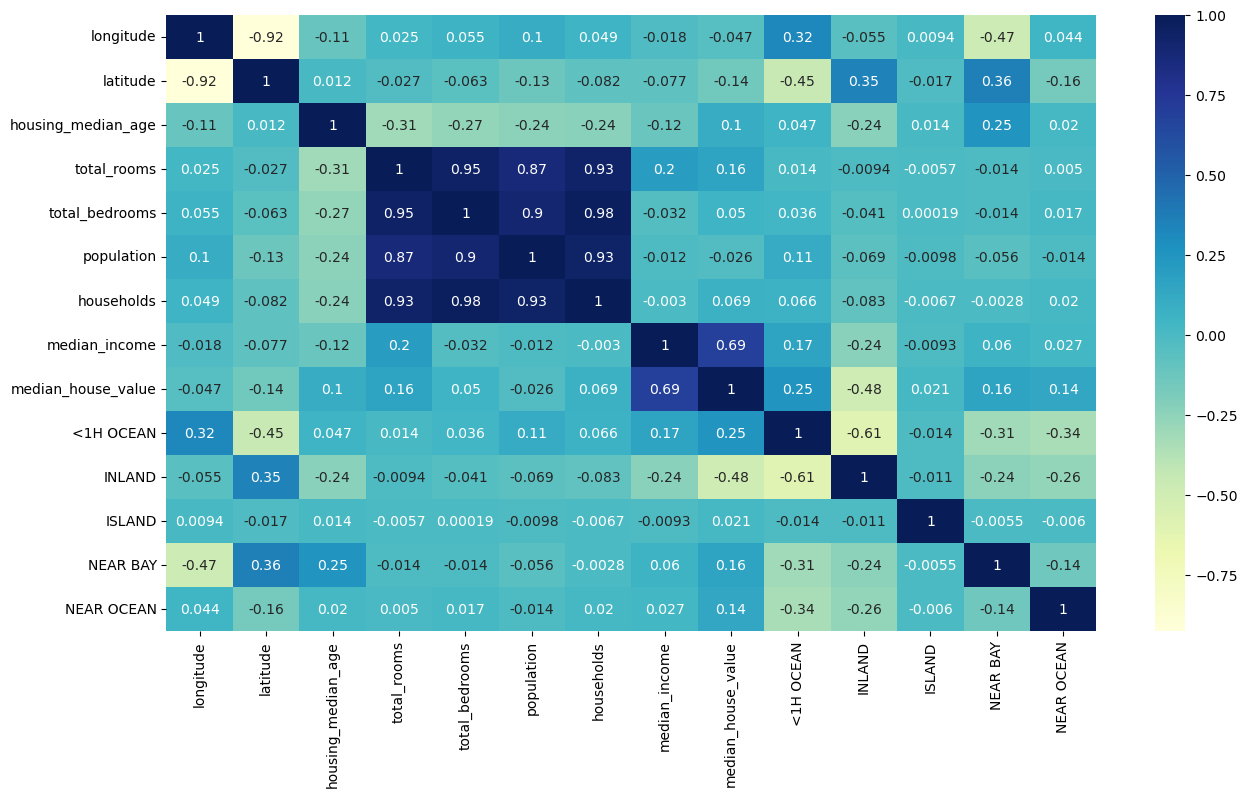

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

On affiche maintenant notre nouvelle matrice de corrélation.

A titre d'exemple, la correlation de <strong>median_house_value</strong> et <strong>INLAND</strong> est de -0.48. Ce chiffre négatif pourrait signifier que le prix des maisons tend à diminuer lorsqu'elles sont les terres fermes, loin de la mer.

Allons visualiser cela à travers le code ci-dessous en affichant les latitudes et les longitudes tenant comptes des prix.

<Axes: xlabel='latitude', ylabel='longitude'>

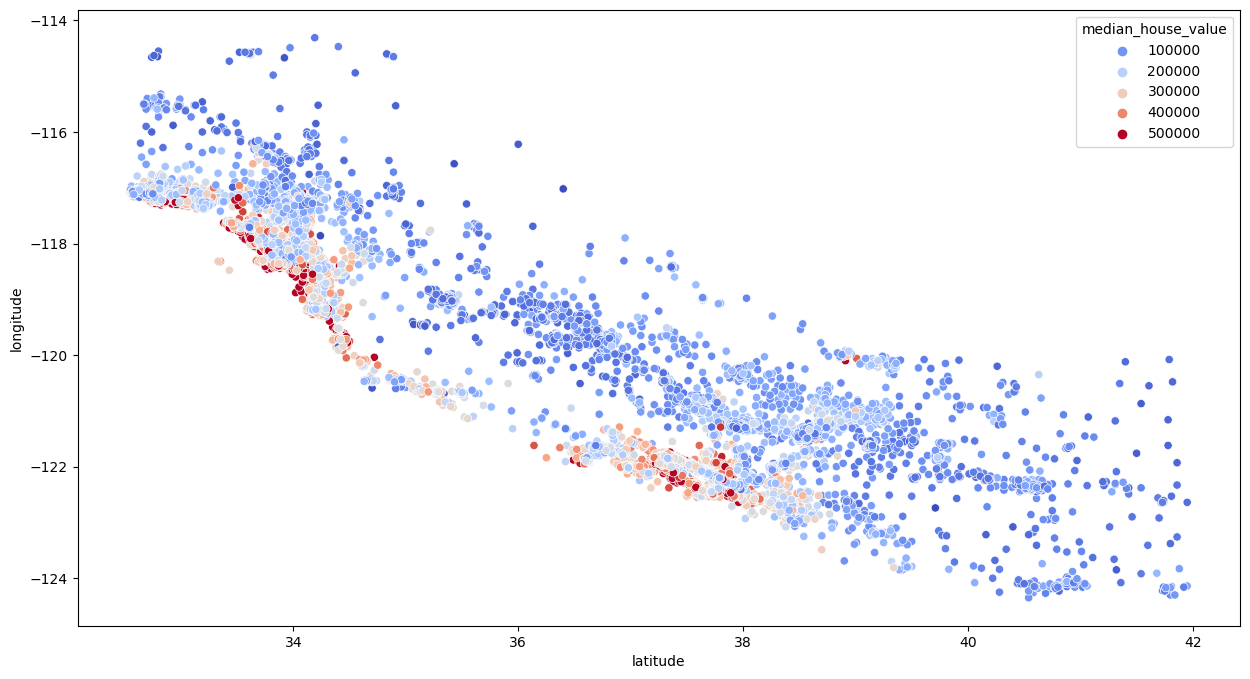

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue ='median_house_value', palette='coolwarm')

Plus la couleur est rouge, plus le prix est élevé. Plus la couleur est bleu, plus le prix est bas.

<strong> Interprétation: </strong> On peut visualiser la côte Californienne à coté des points rouges. Cela prouve encore que les prix sont plus élevés sur les bords. Les 2 petits point rouge isolé peuvent être probablement des îles.

<h1> Feature Engineering </h1>

Le ration de nombre de chambre à coucher pour chaque maison pourrait être intéressant

<strong>bedroom_ratio</strong> : Ce ratio indique la proportion de chambres à coucher par rapport au nombre total de pièces dans une maison. Une valeur plus élevée pourrait suggérer que les maisons ont relativement plus de chambres, tandis qu'une valeur plus basse pourrait indiquer que les maisons ont plus de pièces non utilisées comme chambres (par exemple, salons, cuisines).

<strong>household_rooms</strong> : Ce ratio indique le nombre moyen de pièces par ménage. Une valeur plus élevée pourrait suggérer que les ménages vivent dans des maisons plus grandes, avec plus de pièces par ménage, tandis qu'une valeur plus basse pourrait indiquer que les ménages vivent dans des maisons plus petites avec moins de pièces.

In [25]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

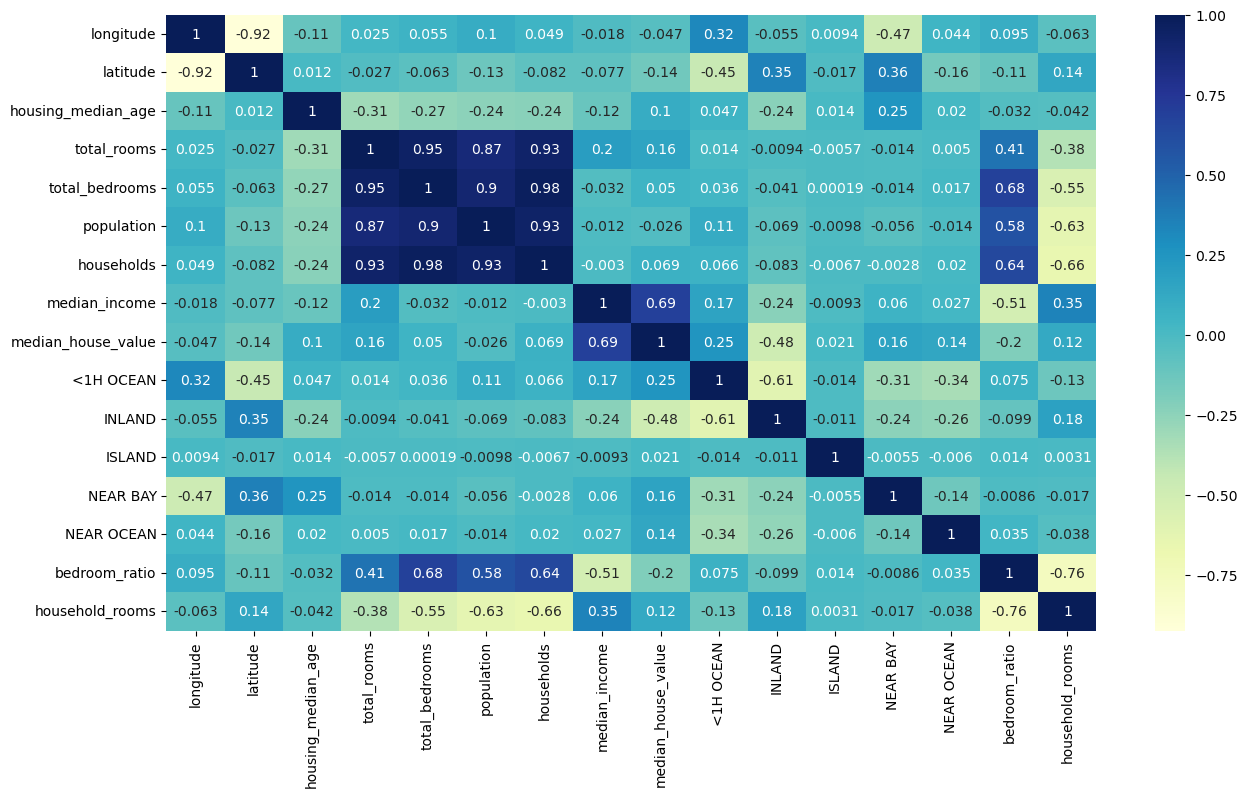

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Les nouveaux features sembles plus ou moins intéressant par rapport à la variable Target.
<strong>bedroom_ratio</strong> donne une corrélation de -0.16. 

Tandis qu'avec <strong>household_rooms</strong>, on a une corrélation de 0.088

<h1> Entrainement du modèle </h1>

<h2>Linear Regression</h2>

In [27]:
from sklearn.linear_model import LinearRegression

#On refait une seconde fois le split pour etre sur, vu que notre dataset a été modifié
X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

Nous allons refaire les différentes étapes éfféctuées sur notre Data Set d'entrainement mais maintenant sur notre Data Set de test, afin que le modèle qu'on aura développé avec notre training set puisse être applicable sur le Test Set également.

In [28]:
test_data = X_test.join(y_test)

#Normalisation avec la méthode log
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

#One-hot Encoding, de la varibale cathégorielle et collage avec le dataset de test
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'], axis=1)

#Feature Engineering, avec les différents Ratio
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [29]:
#Séparation des Features et target et de test
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [30]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9787,-120.79,36.06,29.0,7.558517,5.958425,6.927558,5.752573,2.4881,87500.0,1,0,0,0,0,0.788306,1.313937
7655,-118.27,33.82,28.0,7.404279,6.075346,7.362645,6.042633,4.1292,201900.0,1,0,0,0,0,0.820518,1.225340
12694,-121.40,38.56,22.0,7.872455,5.880533,6.732211,5.910797,7.1430,327800.0,0,1,0,0,0,0.746976,1.331877
7555,-118.19,33.91,33.0,6.820016,5.420535,6.717805,5.361292,2.7708,117400.0,1,0,0,0,0,0.794798,1.272084
2022,-119.78,36.72,22.0,5.872118,4.804021,6.274762,4.753590,2.1458,34400.0,0,1,0,0,0,0.818107,1.235302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,-118.24,34.23,42.0,7.340836,5.638355,6.625392,5.579730,5.1028,292100.0,1,0,0,0,0,0.768081,1.315626
1137,-121.66,39.66,17.0,8.161375,6.486161,7.475339,6.419995,2.9625,101200.0,0,1,0,0,0,0.794739,1.271243
6249,-117.98,34.05,33.0,7.353082,5.755742,7.291656,5.749393,4.1429,159800.0,1,0,0,0,0,0.782766,1.278932
8092,-118.22,33.82,30.0,7.427144,6.152733,7.484369,6.063785,3.6086,146300.0,0,0,0,0,1,0.828412,1.224836


In [31]:
reg.score(X_test, y_test)

0.6669586232842712

In [32]:
reg.score(X_train, y_train)

0.6719068917568487

Pour les modèles de régression en scikit-learn, la méthode score calcule généralement le coefficient de détermination R2. Le R2 est une mesure de la proportion de la variance de la variable dépendante qui est prévisible à partir des variables indépendantes.

Un R2 de 0.6835783062361523 est assez moyen, ni très mauvais ni bon.</br> 
<strong>Allons Scaler nos données d'abord! </strong>

<h2> Re Scaling </h2>

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)

reg.fit(X_train_s, y_train) # on n'a pas besoin de scler l'output ( généralement)

LinearRegression()

In [34]:
X_test_s = scaler.transform(X_test)

In [35]:
reg.score(X_test_s, y_test)

0.6669586232842712

Apparemmment, nous n'avons pas eu de score meilleur que celui du précedent. Nous allons tester sur un autre algorithme plus performant

<h2>Random Forest</h2>

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
forest.score(X_test, y_test)

0.8247357906908028

Nous pouvons aussi tester si on peut avoir un resultat un peu mieux en faisant le Scaling, c'est à dire en utilisant <em>X_test_s</em>

In [38]:
forest_s = RandomForestRegressor()

forest_s.fit(X_train_s, y_train)

RandomForestRegressor()

In [39]:
forest_s.score(X_test_s, y_test)

0.8256081950369566

C'est presque les mêmes résultats, rescaler n'est pas très intéressant ici ! Allons utiliser un autre algorithme : Le Cross Validation

<h2> GridSearchCV / Cross Validation </h2>

<em>GridSearchCV</em> est une méthode de recherche d'hyperparamètres. Elle permet de trouver la meilleure combinaison d'hyperparamètres pour améliorer la performance du modèle. Elle est ici utilisée afin d'améliorer notre algorithme <em>RandomForestRegressor()</em>

In [ ]:
from sklearn.model_selection import GridSearchCV

forest_3 = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'max_depth':[None, 4, 8]
}

grid_search_result = GridSearchCV(forest_3,
                                 param_grid,
                                 cv=5,
                                 scoring="neg_mean_squared_error",
                                 return_train_score=True)

grid_search_result.fit(X_train_s, y_train)

In [48]:
best_forest = grid_search_result.best_estimator_

In [49]:
best_forest.score(X_test_s, y_test)

0.8180910769337179